<a href="https://colab.research.google.com/github/kokchun/Deep-learning-AI21/blob/main/Lectures/Lec0-MLP_regression.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; for interacting with the code


---
# Lecture notes - Multilayered perceptron (MLP) for regression
---

This is the lecture note for **MLP** or more precisely ANN with one input layer and one output layer, which is a basic neural networks, that can be used for regression

<p class = "alert alert-info" role="alert"><b>Note</b> that this lecture note gives a brief introduction to MLP. I encourage you to read further about MLP. </p>

Read more:

- [Sequential model guide - TensorFlow](https://www.tensorflow.org/guide/keras/sequential_model)
- [InputLayer - TensorFlow](https://www.tensorflow.org/api_docs/python/tf/keras/layers/InputLayer)
- [Dense layer - TensorFlow](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)
- [Visualize model training history - machinelearningmastery](https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/)
- [Multilayered Perceptron - wikipedia](https://en.wikipedia.org/wiki/Multilayer_perceptron)
- [Activation function - wikipedia](https://en.wikipedia.org/wiki/Activation_function)
- [Backpropagation - wikipedia](https://en.wikipedia.org/wiki/Backpropagation)

---


In [1]:
import tensorflow

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


plt.style.use("seaborn-white")
df = sns.load_dataset("mpg").drop("name", axis=1)

df.head()
# model_year not ordinal


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa


In [3]:
df.origin.value_counts()

usa       249
japan      79
europe     70
Name: origin, dtype: int64

<AxesSubplot:>

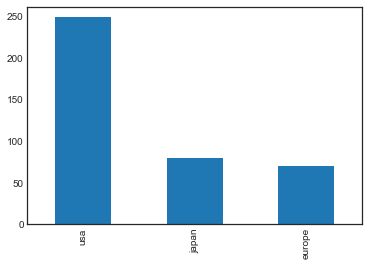

In [4]:
df["origin"].value_counts().plot(kind="bar")
# only 3 different categories

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


In [6]:
df.horsepower.isna().sum()

6

In [7]:
df.query('horsepower.isna()') 
# note that we coud use a regression model to fill in the missing values 
# if the error of the regression model isn't too large 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
32,25.0,4,98.0,NaN,2046,19.0,71,usa
126,21.0,6,200.0,NaN,2875,17.0,74,usa
330,40.9,4,85.0,NaN,1835,17.3,80,europe
336,23.6,4,140.0,NaN,2905,14.3,80,usa
354,34.5,4,100.0,NaN,2320,15.8,81,europe
374,23.0,4,151.0,NaN,3035,20.5,82,usa


In [8]:
# to simplify we drop the NaNs 
df.dropna(inplace=True, axis = 0)

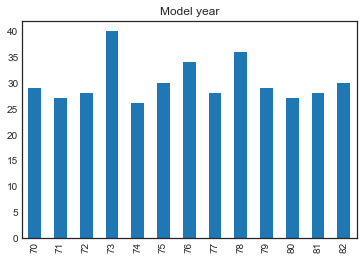

In [9]:
df["model_year"].value_counts().sort_index().plot(kind="bar", title="Model year");
# 13 categories -> one hot encode would create many more dimensions
# an idea is to group the years e.g. 70-73, 74-77, 78-82 or other group that could be useful if combined with
# domain knowledge

In [10]:
bins = pd.IntervalIndex.from_tuples([(69, 73), (74,77), (78,82)])

df["model_year"] = pd.cut(df["model_year"], bins=bins)

df = pd.get_dummies(df, columns = ["model_year", "origin"], drop_first=True)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,"model_year_(74, 77]","model_year_(78, 82]",origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,0,0,0,1
1,15.0,8,350.0,165.0,3693,11.5,0,0,0,1
2,18.0,8,318.0,150.0,3436,11.0,0,0,0,1
3,16.0,8,304.0,150.0,3433,12.0,0,0,0,1
4,17.0,8,302.0,140.0,3449,10.5,0,0,0,1


---
## Train|test-split

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # to use gradient descent

# very important to pick out the values as keras/tensorflow can work with np.arrays(through .value) but not DataFrames
X, y = df.drop("mpg", axis = 1).values, df["mpg"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

X_train.shape, X_test.shape

((274, 9), (118, 9))

In [12]:
scaled_X_train.max()

3.2869431314281545

---
## Multiple linear regression

In [13]:
from sklearn.linear_model import LinearRegression

model_linear_regression = LinearRegression()
model_linear_regression.fit(scaled_X_train, y_train)

intercept, coefficients = model_linear_regression.intercept_, model_linear_regression.coef_
coefficients

array([-0.07963534,  0.71698622, -1.5802261 , -4.49219087, -0.08849455,
        0.36793355,  2.76523073,  0.02957218, -1.25074873])

---
## Shallow Artificial neural network (ANN)

- This is a shallow network without any hidden layers and activation function. 
- Its behavior is the same as a linear regression. 
- It is trained using backpropagation and stochastic gradient descent (SGD)
- Using keras, it is trivial to add more layers and nodes to create a deep MLP, i.e. with many hidden layers

See theory lecture to see how backpropagation works.

In [14]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.optimizers import SGD

model_shallow = Sequential(name="Shallow_network")
# one node per feature
model_shallow.add(InputLayer(X_train.shape[1], name="Input_layer"))
# note no activation function --> linear regression
# one output node for one value, no activation is same as linear activation
model_shallow.add(Dense(1, name="Output_layer"))
model_shallow.compile(loss="mean_squared_error",
                      optimizer=SGD(learning_rate=.01))
model_shallow.summary()


Model: "Shallow_network"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Output_layer (Dense)        (None, 1)                 10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [15]:
# fit to training data 
model_shallow.fit(scaled_X_train, y_train, epochs = 50, verbose=0,
                  validation_data=(scaled_X_test, y_test))

# note that we don't use the test loss in this case to change any hyperparameters
# hence it is okay to use test in the validation_data here 
# for this dataset it would be better to use cross-validation for hyperparameter tuning as 
# we don't have much data
# verbose = 1: print out the loss for each epoch

---
## Loss curves

Note that the loss of training data is minimized through backpropagation and an optimizer e.g. gradient descent. 

- for each epoch the weights are adjusted such that the loss is getting smaller and smaller
- the loss is a describing the difference between the target label and the prediction in some chosen metric
- if we see a clear increase of validation loss while the training loss is decreasing, the model has overfitted to the data and has problem generalising.
- appropriate actions can be taken to decrease overfitting 

In [16]:
df_loss = pd.DataFrame(model_shallow.history.history)
df_loss.head()

,loss,val_loss
0,515.585205,367.957092
1,354.182068,252.785324
2,248.992416,174.585312
3,176.971115,121.411781
4,126.963287,85.568375


In [17]:
df_loss.index = range(1, len(df_loss)+1)
df_loss.head()

,loss,val_loss
1,515.585205,367.957092
2,354.182068,252.785324
3,248.992416,174.585312
4,176.971115,121.411781
5,126.963287,85.568375


<AxesSubplot:title={'center':'Training loss and test loss'}, xlabel='Epochs', ylabel='Loss'>

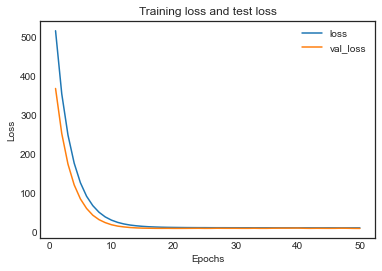

In [18]:
df_loss.plot(xlabel="Epochs",
            ylabel="Loss", title="Training loss and test loss")
# this result shows no overfitting as both training loss and validation loss converges

In [19]:
weights, bias = model_shallow.layers[0].get_weights()

print(f"Linear regression {coefficients=}")
print(f"Shallow ANN {weights=}")
print(f"Linear regression {intercept=}")
print(f"Shallow ANN {bias=}")

# we see that the intercept is very similar value of linear regression and our shallow ANN.
# also the intercept is much larger than the weights and has larger impact in this case 
# in fact when we don't have any hidden layers and no non-linear activation funtion our ANN is performing 
# linear regression. 

Linear regression coefficients=array([-0.07963534,  0.71698622, -1.5802261 , -4.49219087, -0.08849455,
        0.36793355,  2.76523073,  0.02957218, -1.25074873])
Shallow ANN weights=array([[-0.44782504],
       [-0.6013551 ],
       [-1.9254377 ],
       [-2.6655452 ],
       [-0.4945034 ],
       [ 0.2090615 ],
       [ 2.5997887 ],
       [ 0.21170975],
       [-0.98458225]], dtype=float32)
Linear regression intercept=23.637591240875913
Shallow ANN bias=array([23.656984], dtype=float32)


---
## Prediction and evaluation

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred_ANN = model_shallow.predict(scaled_X_test)
y_pred_lin_reg = model_linear_regression.predict(scaled_X_test)

print("MAE, RMSE for ANN:")
print(mean_absolute_error(y_test, y_pred_ANN), np.sqrt(mean_squared_error(y_test, y_pred_ANN)))

print("MAE, RMSE for linear regression:")
print(mean_absolute_error(y_test, y_pred_lin_reg), np.sqrt(mean_squared_error(y_test, y_pred_lin_reg)))

MAE, RMSE for ANN:
2.482659464367365 3.1664648207023753
MAE, RMSE for linear regression:
2.52233354282375 3.1212202349360934


In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


def evaluate_regression(y_pred):
    mse = mean_squared_error(y_test, y_pred)
    return mean_absolute_error(y_test, y_pred), mse, np.sqrt(mse)


y_pred_ANN = model_shallow.predict(scaled_X_test)
y_pred_lin_reg = model_linear_regression.predict(scaled_X_test)

scores = {model: evaluate_regression(y_pred) for model, y_pred in zip(
    ["ANN", "Linear regression"], [y_pred_ANN, y_pred_lin_reg])}

df_scores = pd.DataFrame(scores, index=["MAE", "MSE", "RMSE"]).T
# compute proportion of RMSE error with respect to the mean of test data
df_scores["RMSE_proportion"] = df_scores["RMSE"]/y_test.mean()
df_scores


,MAE,MSE,RMSE,RMSE_proportion
ANN,2.482659,10.026499,3.166465,0.137667
Linear regression,2.522334,9.742016,3.121220,0.135700


---
## MLP 

In the exercise notebook, you will work with expanding this shallow model into a deep MLP.  